# Stocks of Beverages Project

Long term investment Analyze Project

In [1]:
# Import Libraries
from pandas_datareader import data as pdr
import fix_yahoo_finance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [2]:
tickers = ['DPS', 'KO', 'PEP', '^GSPC']
start = '2011-1-1' 
end = '2015-12-31'

In [3]:
for stock in tickers:
    globals()[stock] =  pdr.get_data_yahoo(stock, start, end)

[*********************100%***********************]  1 of 1 downloaded

In [4]:
closing_df = pdr.get_data_yahoo(tickers, start, end)['Adj Close']

[*********************100%***********************]  4 of 4 downloaded

In [5]:
closing_df.head()

,DPS,KO,PEP,^GSPC
Date,,,,
2011-01-03,29.253212,26.384809,53.635735,1271.869995
2011-01-04,29.344131,25.838673,53.358395,1270.199951
2011-01-05,29.964083,25.684940,54.320961,1276.560059
2011-01-06,30.236858,25.498850,54.524902,1273.849976
2011-01-07,29.294533,25.454348,54.157818,1271.500000


In [6]:
closing_df.describe()

,DPS,KO,PEP,^GSPC
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,48.106189,33.473735,70.699609,1657.088005
std,16.514813,4.090473,13.952918,314.063224
min,27.881060,25.101032,49.944374,1099.229980
25%,34.712327,30.303735,57.327039,1352.502472
50%,41.488077,34.029652,71.185970,1650.489990
75%,59.604153,36.893846,84.926155,1972.627502
max,91.071739,41.079517,96.731407,2130.820068


In [7]:
tickers_rets = closing_df.pct_change()

In [8]:
tickers_rets.head()

,DPS,KO,PEP,^GSPC
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,0.003108,-0.020699,-0.005171,-0.001313
2011-01-05,0.021127,-0.005950,0.018040,0.005007
2011-01-06,0.009103,-0.007245,0.003754,-0.002123
2011-01-07,-0.031165,-0.001745,-0.006732,-0.001845


In [9]:
tickers_rets.describe()

,DPS,KO,PEP,^GSPC
count,1257.000000,1257.000000,1257.000000,1257.000000
mean,0.000955,0.000382,0.000489,0.000425
std,0.011529,0.009555,0.008837,0.009738
min,-0.058032,-0.060291,-0.045922,-0.066634
25%,-0.005907,-0.004720,-0.004661,-0.004004
50%,0.001151,0.000239,0.000325,0.000544
75%,0.007647,0.005835,0.005347,0.005278
max,0.056934,0.056872,0.042275,0.047407


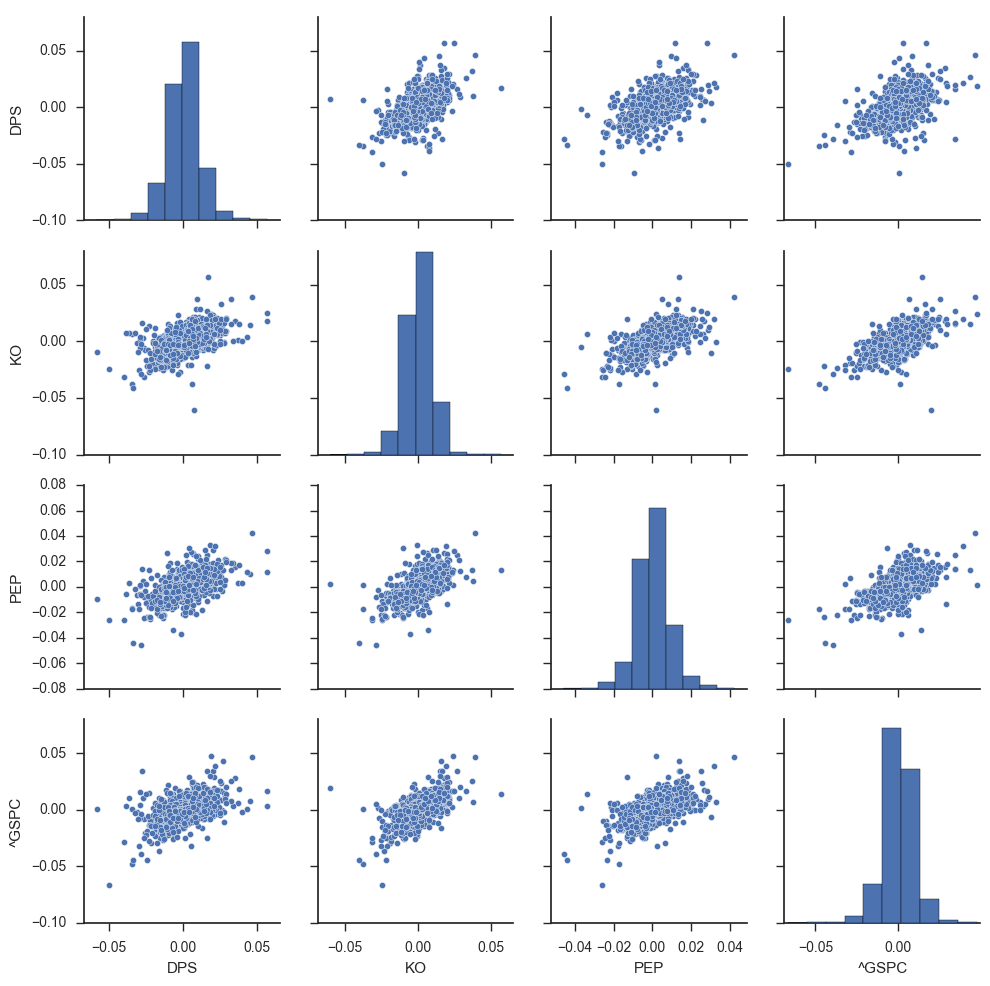

In [10]:
sns.set(style='ticks')
ax = sns.pairplot(tickers_rets.dropna(), diag_kind='hist')

nplot = len(tickers_rets.columns)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

C:\Users\Tin Hang\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
C:\Users\Tin Hang\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


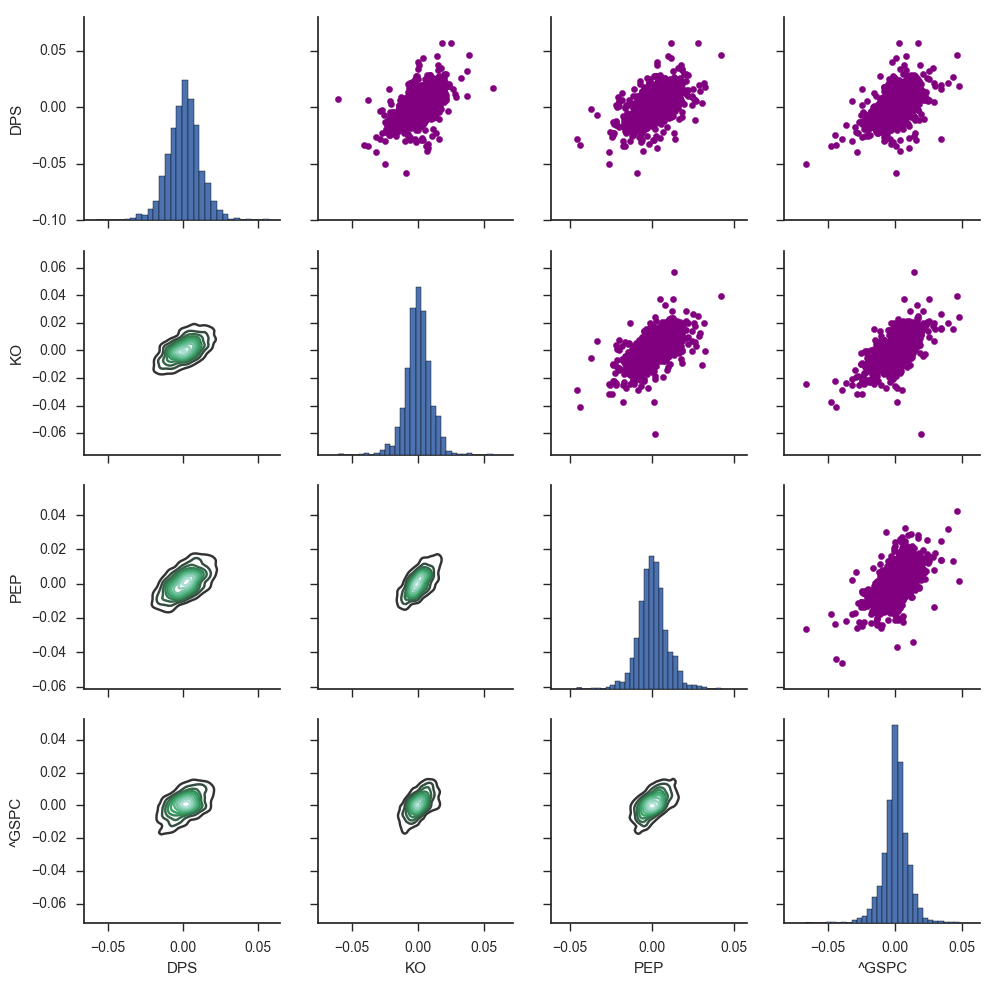

In [11]:
ax = sns.PairGrid(tickers_rets.dropna())
ax.map_upper(plt.scatter, color='purple')
ax.map_lower(sns.kdeplot, color='hlr')
ax.map_diag(plt.hist, bins=30)
for i in range(nplot) :
    for j in range(nplot) :
        ax.axes[i, j].locator_params(axis='x', nbins=6, tight=True)

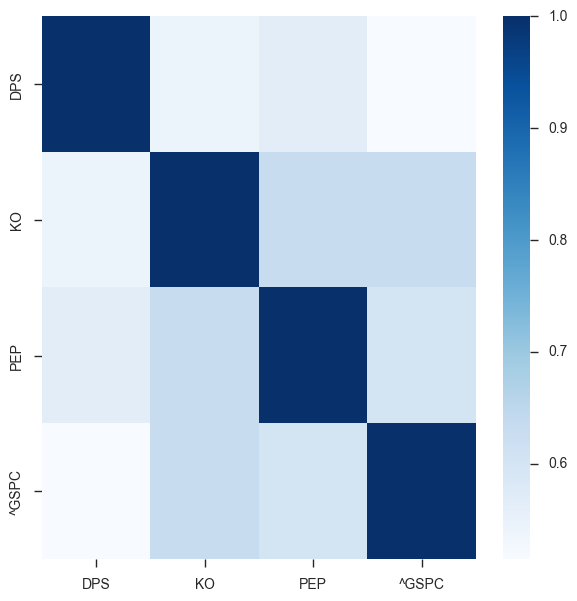

In [12]:
plt.figure(figsize=(7,7))
corr = tickers_rets.corr()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
            cmap="Blues")

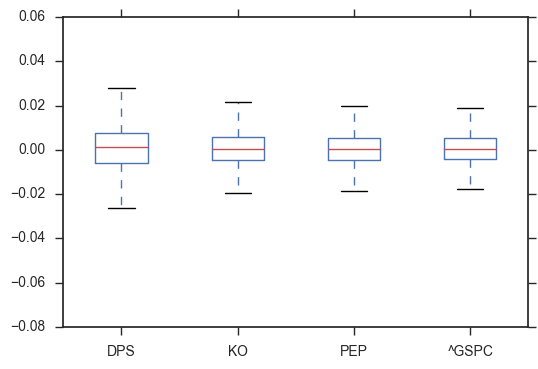

In [13]:
# Box plot
tickers_rets.plot(kind='box')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002246051D080>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000022460BD7710>]], dtype=object)

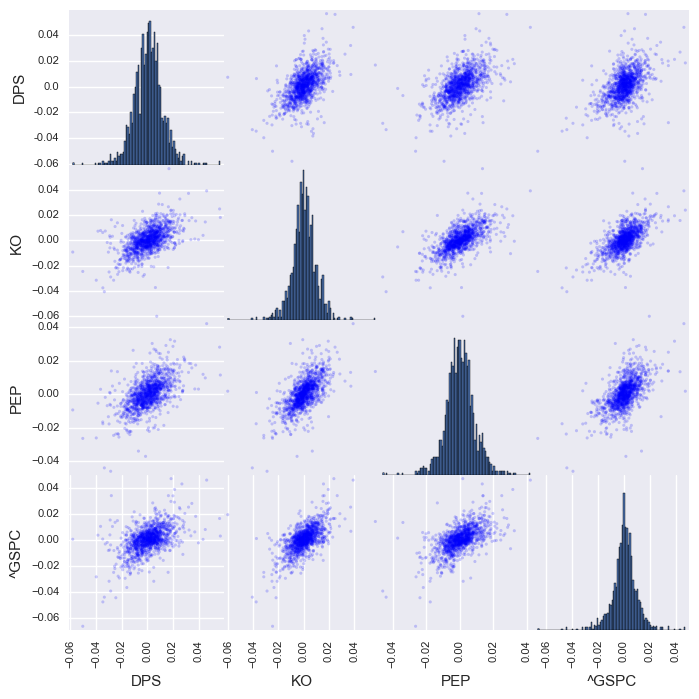

In [44]:
from pandas.plotting import scatter_matrix
scatter_matrix(tickers_rets, figsize=(8,8),alpha=0.2, hist_kwds={'bins':100})

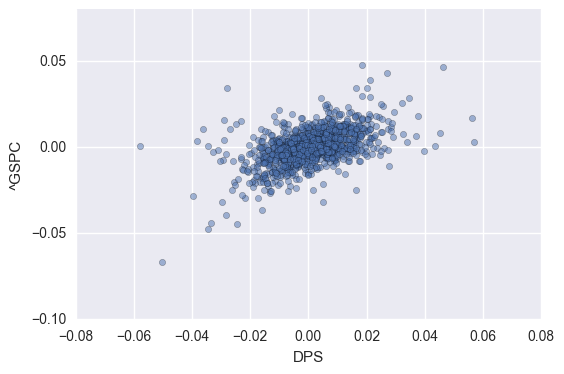

In [47]:
tickers_rets.plot(kind='scatter', x = "DPS", y = "^GSPC", alpha=0.5)

In [49]:
# Cumulative Returns
tickers_CR = (1 + tickers_rets).cumprod()
tickers_CR.head()

,DPS,KO,PEP,^GSPC
Date,,,,
2011-01-03,NaN,NaN,NaN,NaN
2011-01-04,1.003108,0.979301,0.994829,0.998687
2011-01-05,1.024301,0.973475,1.012776,1.003688
2011-01-06,1.033625,0.966422,1.016578,1.001557
2011-01-07,1.001413,0.964735,1.009734,0.999709


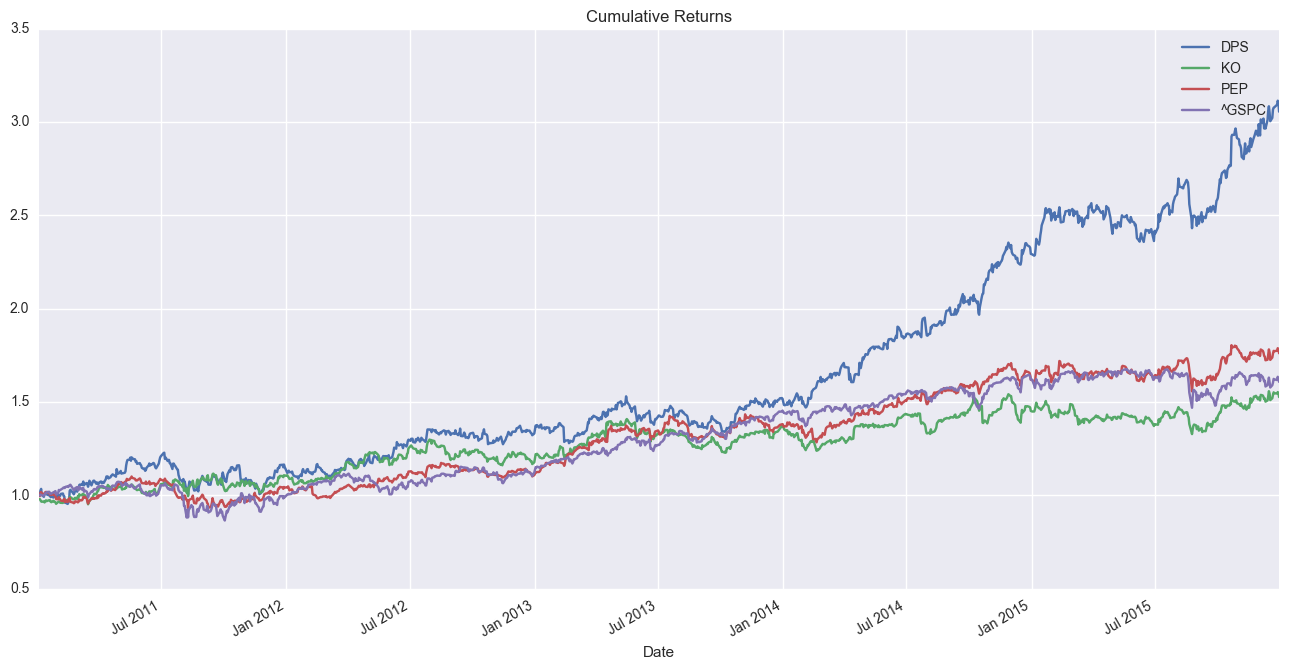

In [50]:
tickers_CR.plot(figsize=(16,8))
plt.title("Cumulative Returns")
plt.legend()

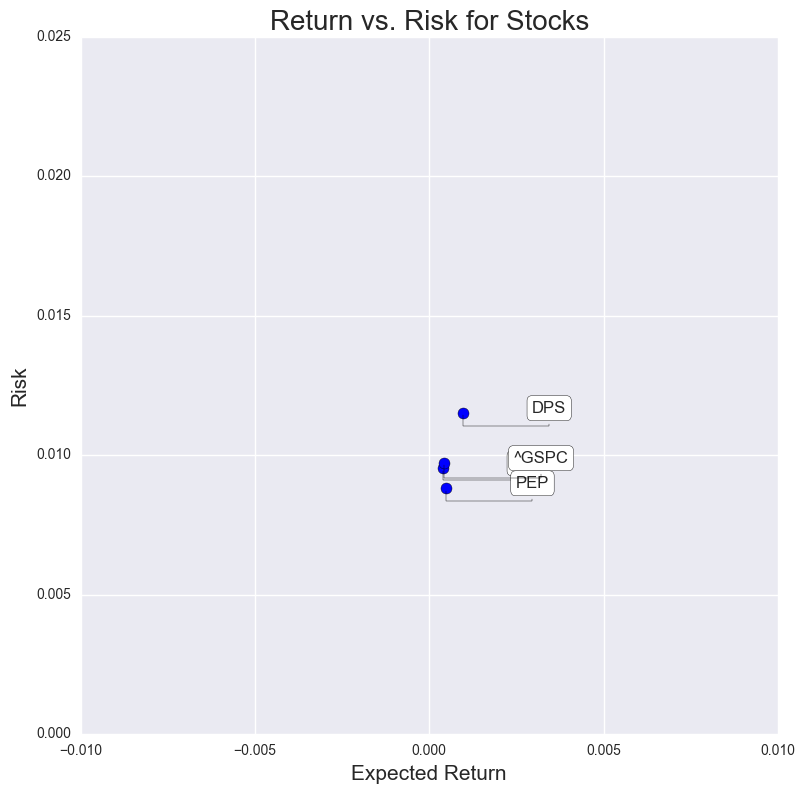

In [14]:
rets = tickers_rets.dropna()
area = np.pi*20.0

sns.set(style='darkgrid')
plt.figure(figsize=(9,9))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel("Expected Return", fontsize=15)
plt.ylabel("Risk", fontsize=15)
plt.title("Return vs. Risk for Stocks", fontsize=20)

for label, x, y in zip(rets.columns, rets.mean(), rets.std()) : 
    plt.annotate(label, xy=(x,y), xytext=(50, 0), textcoords='offset points',
                arrowprops=dict(arrowstyle='-', connectionstyle='bar,angle=180,fraction=-0.2'),
                bbox=dict(boxstyle="round", fc="w"))

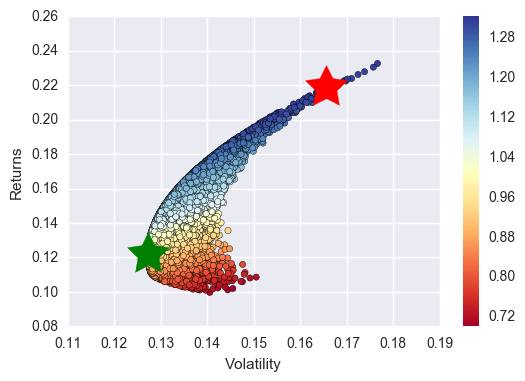

In [15]:
#calculate mean daily return and covariance of daily returns
mean_daily_returns = tickers_rets.mean()
cov_matrix = tickers_rets.cov()

#set number of runs of random portfolio weights
num_portfolios = 25000
 
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(tickers)-1,num_portfolios))
 
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(4))
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
 
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T,np.dot(cov_matrix, weights))) * np.sqrt(252)
 
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
 
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(results.T,columns=['ret','stdev','sharpe',tickers[0],tickers[1],tickers[2],tickers[3]])
 
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]
 
#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.xlabel('Volatility')
plt.ylabel('Returns')
plt.colorbar()
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=1000)
#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=1000)

In [16]:
print(max_sharpe_port)

ret       0.218958
stdev     0.165556
sharpe    1.322558
DPS       0.819269
KO        0.015429
PEP       0.160447
^GSPC     0.004855
Name: 972, dtype: float64


In [17]:
print(min_vol_port)

ret       0.122192
stdev     0.127266
sharpe    0.960126
DPS       0.077602
KO        0.233362
PEP       0.450357
^GSPC     0.238679
Name: 23034, dtype: float64


In [18]:
total_rets = (tickers_rets + 1).prod() -1
total_rets.head()

DPS      2.054557
KO       0.525686
PEP      0.760447
^GSPC    0.607035
dtype: float64

In [19]:
price = closing_df
total_max_growth = closing_df.max() / closing_df.min()
total_max_growth

DPS      3.266437
KO       1.636567
PEP      1.936783
^GSPC    1.938466
dtype: float64

In [20]:
total_growth = price.iloc[0] / price.iloc[-1]
total_growth

DPS      0.327380
KO       0.655443
PEP      0.568038
^GSPC    0.622264
dtype: float64

In [21]:
old_date = price.index[-1]
now_date = price.index[0]
growth_per_year = total_growth ** (1.0 / (now_date.year - old_date.year))
growth_per_year

DPS      1.322017
KO       1.111389
PEP      1.151876
^GSPC    1.125917
dtype: float64

In [22]:
price_in_years = price.to_period(freq='A').groupby(level=0).first()
price_in_years

,DPS,KO,PEP,^GSPC
Date,,,,
2011,29.253212,26.384809,53.635735,1271.869995
2012,32.710155,29.194763,55.872936,1277.060059
2013,40.165096,32.180519,60.182659,1462.420044
2014,43.406883,35.799370,73.292816,1831.979980
2015,66.992249,38.214489,86.716621,2058.199951


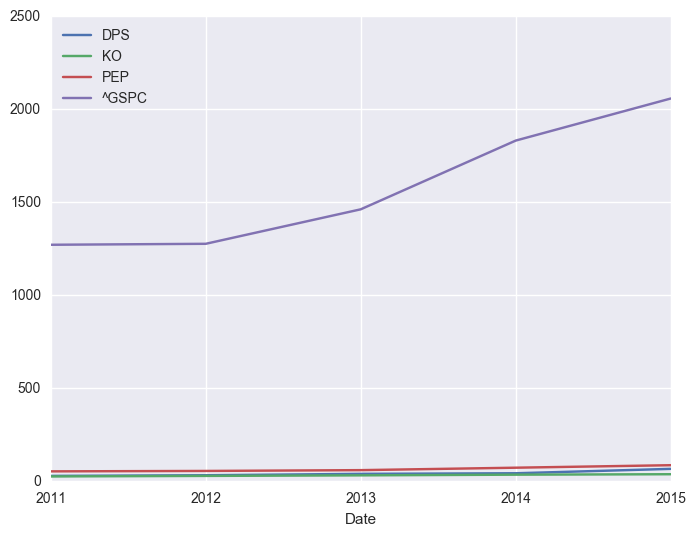

In [23]:
price_in_years.plot(figsize=(8,6))

In [24]:
diff = price_in_years.diff()
rate_in_years =  diff / (price_in_years - diff)
rate_in_years

,DPS,KO,PEP,^GSPC
Date,,,,
2011,NaN,NaN,NaN,NaN
2012,0.118173,0.106499,0.041711,0.004081
2013,0.227909,0.102270,0.077134,0.145146
2014,0.080712,0.112455,0.217839,0.252704
2015,0.543355,0.067463,0.183153,0.123484


In [25]:
rate_in_years.mean()

DPS      0.242537
KO       0.097172
PEP      0.129959
^GSPC    0.131354
dtype: float64

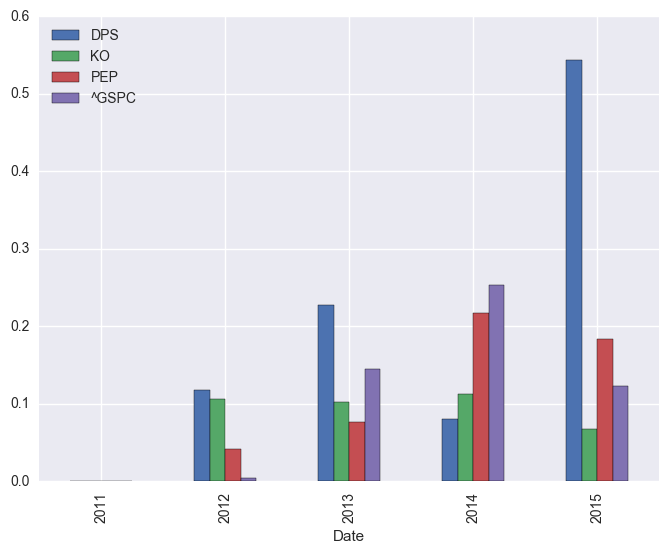

In [26]:
rate_in_years.plot(kind='bar', figsize=(8,6))

In [27]:
price_in_months = price.to_period(freq='M').groupby(level=0).first()
price_in_months

,DPS,KO,PEP,^GSPC
Date,,,,
2011-01,29.253212,26.384809,53.635735,1271.869995
2011-02,29.220144,25.506939,53.064713,1307.589966
2011-03,30.178999,26.259403,51.563725,1306.329956
2011-04,31.216574,27.391096,53.610493,1332.410034
2011-05,32.781147,27.594835,56.972458,1361.219971
2011-06,34.071083,27.203655,58.199440,1314.550049
2011-07,35.355915,27.946468,58.116650,1339.670044
2011-08,31.514158,27.798723,52.875465,1286.939941
2011-09,32.067772,28.915098,53.542973,1204.420044


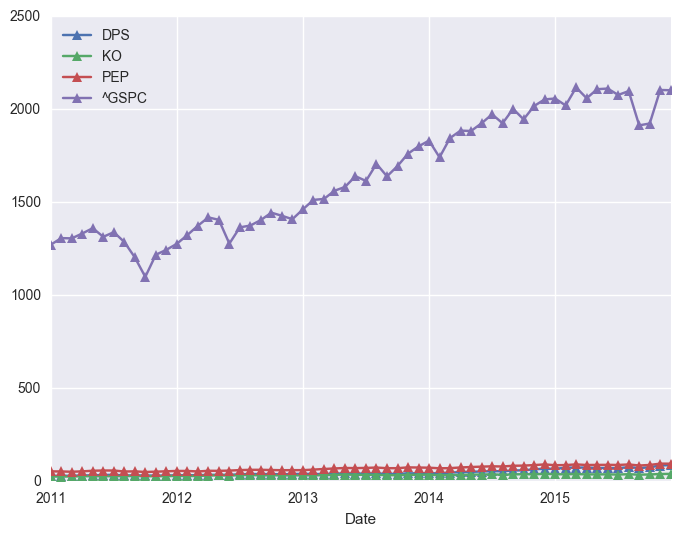

In [28]:
price_in_months.plot(figsize=(8,6), marker='^')

In [29]:
diff = price_in_months.diff()
rate_in_months =  diff / (price_in_months - diff)
rate_in_months

,DPS,KO,PEP,^GSPC
Date,,,,
2011-01,NaN,NaN,NaN,NaN
2011-02,-0.001130,-0.033272,-0.010646,0.028085
2011-03,0.032815,0.029500,-0.028286,-0.000964
2011-04,0.034381,0.043097,0.039694,0.019964
2011-05,0.050120,0.007438,0.062711,0.021622
2011-06,0.039350,-0.014176,0.021536,-0.034285
2011-07,0.037710,0.027306,-0.001423,0.019109
2011-08,-0.108660,-0.005287,-0.090184,-0.039361
2011-09,0.017567,0.040159,0.012624,-0.064121


In [30]:
rate_in_months.mean()

DPS      0.019625
KO       0.008023
PEP      0.010324
^GSPC    0.009317
dtype: float64

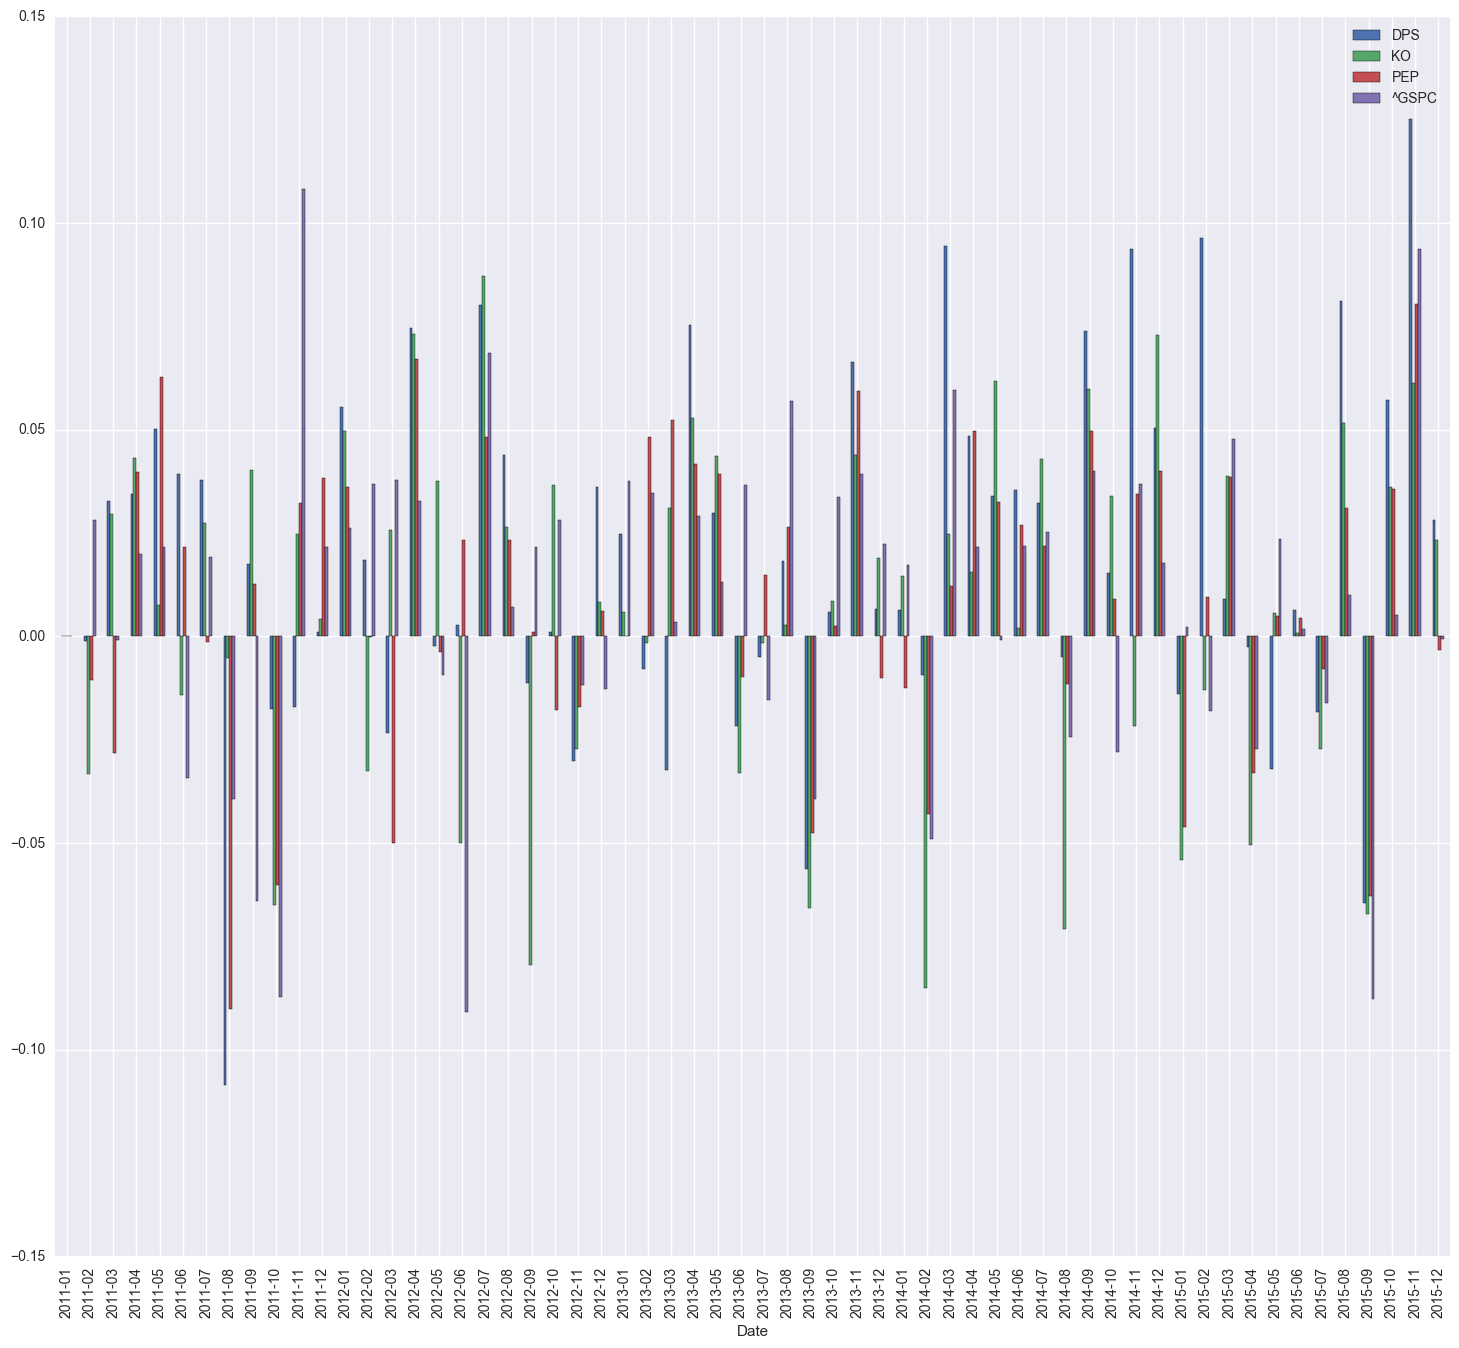

In [31]:
rate_in_months.plot(kind='bar', figsize=(18,16))

In [32]:
price_in_quarters = price.to_period(freq='Q').groupby(level=0).first()
price_in_quarters

,DPS,KO,PEP,^GSPC
Date,,,,
2011Q1,29.253212,26.384809,53.635735,1271.869995
2011Q2,31.216574,27.391096,53.610493,1332.410034
2011Q3,35.355915,27.946468,58.116650,1339.670044
2011Q4,31.502565,27.033752,50.321209,1099.229980
2012Q1,32.710155,29.194763,55.872936,1277.060059
2012Q2,34.962921,31.085703,56.619545,1419.040039
2012Q3,37.773407,33.315834,60.499416,1365.510010
2012Q4,39.014874,32.624249,60.857094,1444.489990
2013Q1,40.165096,32.180519,60.182659,1462.420044


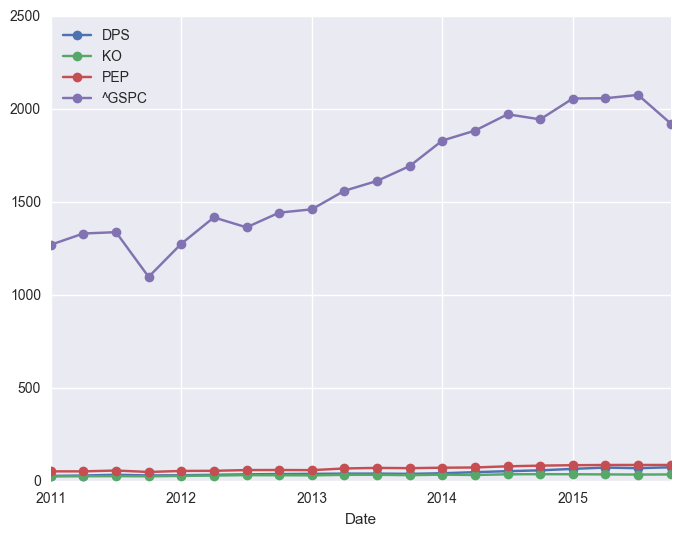

In [33]:
price_in_quarters.plot(figsize=(8,6), marker='o')

In [34]:
diff = price_in_quarters.diff()
rate_in_quarters =  diff / (price_in_quarters - diff)
rate_in_quarters

,DPS,KO,PEP,^GSPC
Date,,,,
2011Q1,NaN,NaN,NaN,NaN
2011Q2,0.067116,0.038139,-0.000471,0.047599
2011Q3,0.132601,0.020276,0.084054,0.005449
2011Q4,-0.108987,-0.032659,-0.134134,-0.179477
2012Q1,0.038333,0.079938,0.110326,0.161777
2012Q2,0.068871,0.064770,0.013363,0.111177
2012Q3,0.080385,0.071741,0.068525,-0.037723
2012Q4,0.032866,-0.020758,0.005912,0.057839
2013Q1,0.029482,-0.013601,-0.011082,0.012413


In [35]:
rate_in_quarters.mean()

DPS      0.053163
KO       0.019116
PEP      0.028109
^GSPC    0.024549
dtype: float64

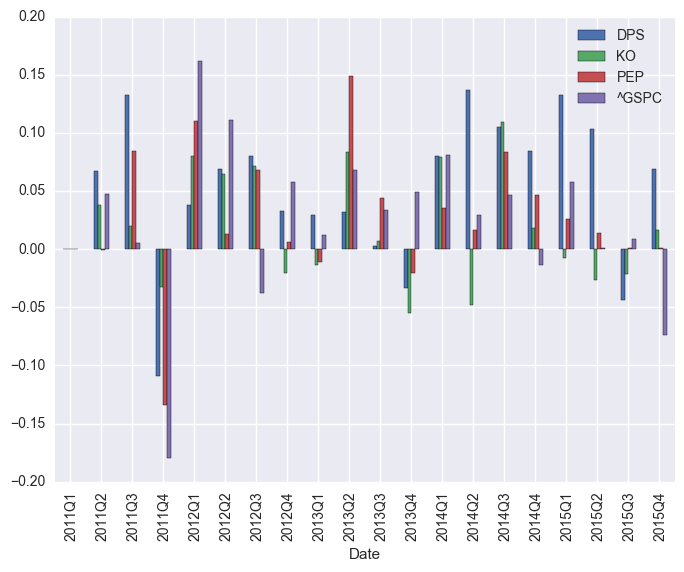

In [36]:
rate_in_quarters.plot(kind='bar', figsize=(8,6))

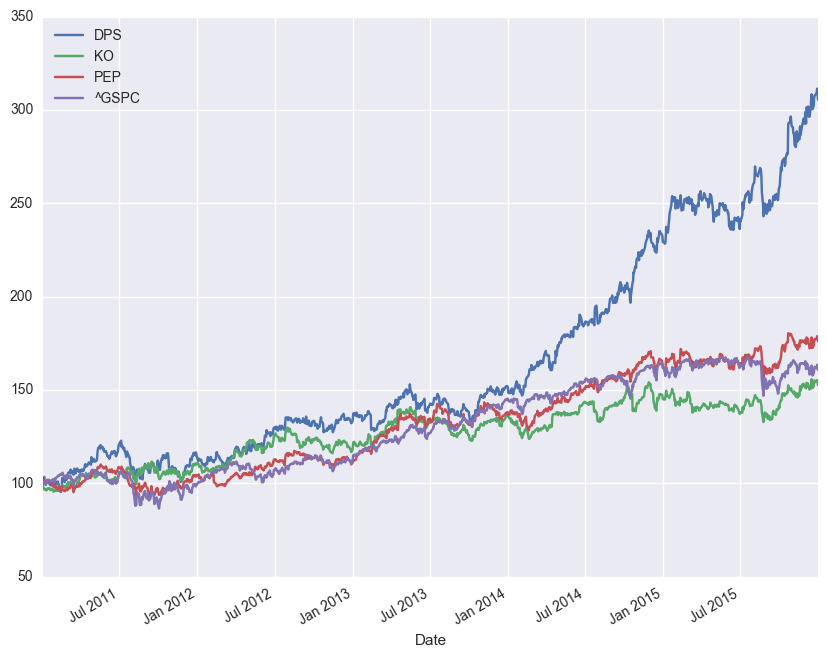

In [37]:
first_prices = price.iloc[0]

normalized = price.div(first_prices).mul(100)

# Plot normalized
normalized.plot(figsize=(10,8))
plt.show()

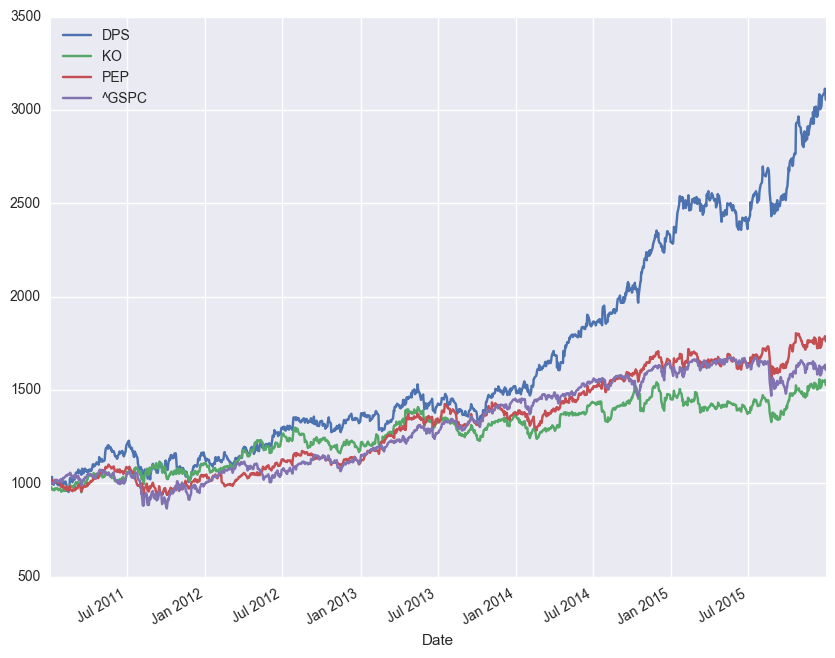

In [38]:
# Define your investment
investment = 1000

# Calculate the daily returns here
returns = price.pct_change()

# Calculate the cumulative returns here
returns_plus_one = returns.add(1)
cumulative_return = returns_plus_one.cumprod()

# Calculate and plot the investment return here 
cumulative_return.mul(investment).plot(figsize=(10,8))
plt.show()


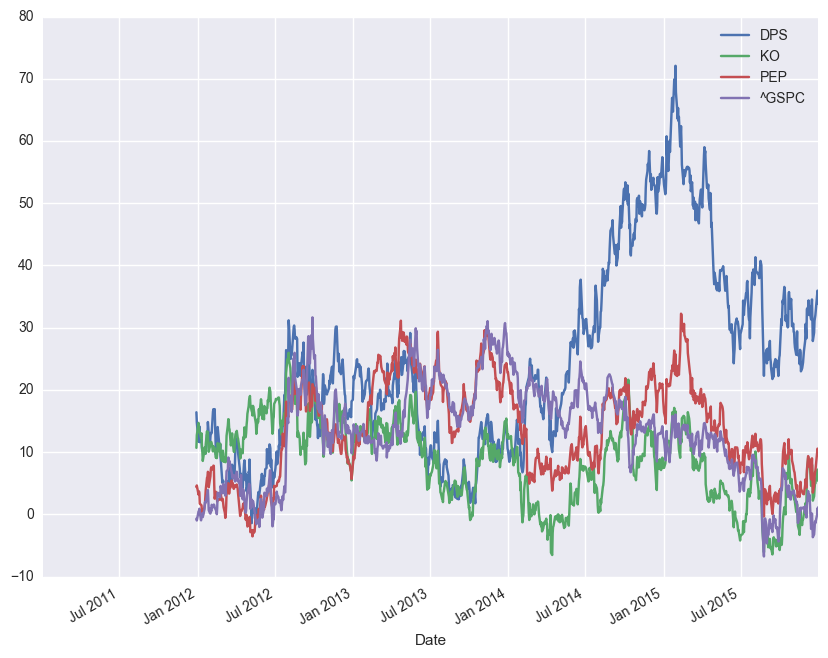

In [39]:
# Define a multi_period_return function
def multi_period_return(period_returns):
    return np.prod(period_returns+1)-1
    
# Calculate daily returns
daily_returns = price.pct_change()

# Calculate rolling_annual_returns
rolling_annual_returns = daily_returns.rolling('360D').apply(multi_period_return)

# Plot rolling_annual_returns
rolling_annual_returns.mul(100).plot(figsize=(10,8))
plt.show()


            DPS        KO       PEP     ^GSPC
DPS    1.000000 -0.623127 -0.014948 -0.531949
KO    -0.623127  1.000000  0.787898  0.896800
PEP   -0.014948  0.787898  1.000000  0.768878
^GSPC -0.531949  0.896800  0.768878  1.000000


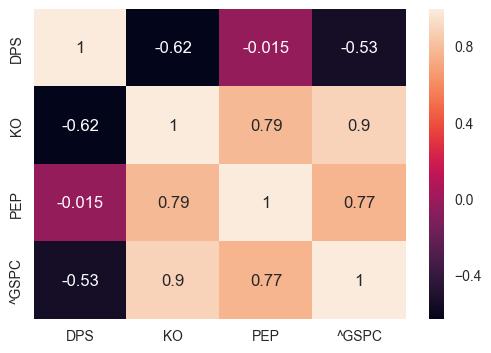

In [40]:
# Calculate year-end prices here
annual_prices = price.resample('A').last()

# Calculate annual returns here
annual_returns = annual_prices.pct_change()

# Calculate and print the correlation matrix here
correlations = annual_returns.corr()
print(correlations)

# Visualize the correlations as heatmap here
sns.heatmap(correlations, annot=True)
plt.show()

In [41]:
import quandl
quandl.ApiConfig.api_key = 'zZN6fzhAQD1x6pAKiHjs'
quandl.ApiConfig.api_version = '2015-04-09'

CorrListStock=[]
dtList = list(range(1,11))

TickList =['DPS', 'KO', 'PEP']
for tick in TickList:
    df = quandl.get('WIKI/'+tick, start_date='2011-01-01', end_date='2015-12-31')
    df.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'Split Ratio', 'Ex-Dividend', 'Adj. High', 'Adj. Low', 'Adj. Volume'], axis=1, inplace=True)
    corr =[]

    for dN in dtList: 
        df['ShiftAdjOpen'] = df['Adj. Open'].shift(dN)
        df['1DayChange'] = df['Adj. Close']-df['Adj. Open']
        df['Shift1DayChange'] = df['1DayChange'].shift(-1)
        df['NDaysChange'] = df ['Adj. Close']-df['ShiftAdjOpen']
        df.drop(['1DayChange', 'ShiftAdjOpen'], axis=1, inplace=True)
        corr.append(np.corrcoef(df.dropna()['NDaysChange'], df.dropna()['Shift1DayChange'])[0][1])

    CorrListStock.append(corr)

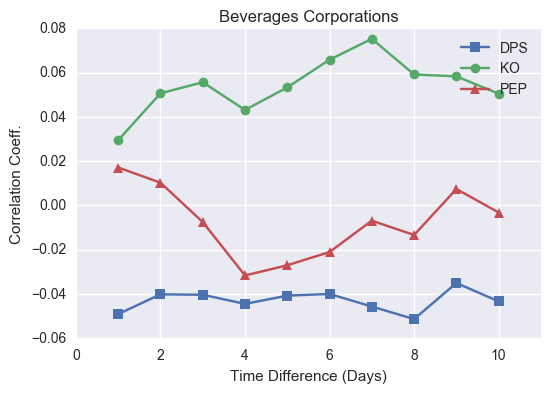

In [42]:
#plot the correlation
import itertools
marker = itertools.cycle(('s', 'o', '^')) 
for ti in range(len(CorrListStock)):
    plt.plot(dtList, CorrListStock[ti], label=TickList[ti], marker=next(marker))


plt.legend()
plt.xlim(0,11)
plt.xlabel('Time Difference (Days)')
plt.ylabel('Correlation Coeff.')
plt.title('Beverages Corporations')